# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2024/2025
## Assignment #3 - Multivariate EDA & Testing Procedures

***
### Group: 
### Names of members: 

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://www.python.org), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=4709), especially L04 & L05.

**Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.**

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and every task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, November 19, 2024, 20:00 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, November 27, 2024, 10:00 - 13:00 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A03_Group_A.ipynb
2. RM_A03_Group_A.pdf

***
***

As a reminder of how to present and be critical with your results in this assignment: 

**Imagine you are a member of a climate research committee. Fellow scientists, journalists, and politicians are interested in your results and your critical scientific evaluation.**

#### Task 1 **[30 points] Correlation Analysis**

For this task, your goal is to perform a correlation analysis on the statistical measurement "[annual CO<sub>2</sub> emissions](https://ourworldindata.org/grapher/annual-co2-emissions-per-country?tab=chart&facet=none&country=~OWID_WRL)" and statistical measurements "mean temperature" and "precipitation" from the CRU climate dataset, with each year representing one data sample. You can download the data associated with the CO<sub>2</sub> emission plot using the link provided above (when accessing each URL, go to menu item _download_ right below the visualization plot).

For this task, use data from years 1901-2022 from the country/entity "WORLD" of each the CRU dataset and the CO<sub>2</sub> emission dataset.

1. Download and import the CO<sub>2</sub> emission dataset and merge the values with the data from the CRU dataset (grouped by year). The result should be a dataframe that contains the annual CO<sub>2</sub> emissions as well as mean temperature and precipitation for each respective year.
2. Create two scatter plots: One showing annual CO<sub>2</sub> emissions vs. mean temperature and the second showing annual CO<sub>2</sub> emissions vs. precipitation.
3. Fit linear regression models to the data used in the scatter plots (e.g., using the [scikit-learn library](https://scikit-learn.org/stable/index.html)) and add the two resulting regression lines to both scatter plots from the previous part of this task.
4. Calculate the Pearson's correlation coefficient for the measurements used in both scatter plots respectively and explain your result briefly.
5. Explain in your own words the following factors that have to be considered when interpreting a correlation coefficient: (A) non-linear relationship, (B) outliers, and (C) correlation vs. causality.

#### Task 2 **[30 points] Hypothesis Testing**

Imagine you want to determine whether global monthly mean temperatures are increasing using the number of warmer and colder months (with respect to the same month 50 years ago, as calculated in Assignment 2) as sample data.
1. State hypotheses $H_0$ and $H_1$ and briefly evaluate whether they're testable and falsifiable.
2. Define both type 1 ($\alpha$) and type 2 ($\beta$) error for the given hypotheses. What is the meaning and what would be the consequence of these errors given your hypotheses?
3. Is the hypothesis test you would perform to answer the given question one-sided or two-sided? Briefly explain your choice.
4. Define the term "statistical power" and its characteristics with respect to the given research question.
5. Apart from the CO<sub>2</sub> emissions as explored in Task 1, which other extraneous factors may also influence the difference of monthly mean temperatures?

#### Task 3 **[40 points] Time Series Analysis**

Your goal for this task is to do a time series analysis on two unknown time series. You can download the two series through an API call (see below). <br>
<b>Please note the following things:</b>

- The data server will always return slightly <b>different data</b> on each API call!
- You can use the code below to retrieve the data once(!), save the data into a file, share it with your team members, and then use the file for further analysis. This way everyone in the group is always working on the same data.
- Submit the data file, <b>including the retrieval date</b> (as shown in the example code), so that we can see what data you have based your analysis on. 
- The example code does not have to be submitted (i.e., you can delete it once you have the data saved). 

On the retrieved data, please perform the following analysis:
1. Plot the two time series so that they can be visually compared. Analyze them visually and state some first hypotheses based on your visual analysis.
2. Perform smoothing on each time series and plot the smoothed series together with the original. Make sure the viewer can clearly recognize which line is the smoothed one. For the smoothing procedure, choose a method and window size $n$ that makes most sense to you. Explain and evaluate your choice briefly.
3. Using appropriate statistics, analyze both time series to look for the following: (A) trend, (B) cyclic variation, and (C) cross correlations. For each feature, explain what the analysis has shown.
4. Revisit your first hypotheses from Task 3.1 and interpret all findings from Task 3.2 and Task 3.3 in the light of your first ideas. How has your first impression changed? What have you been able to show through your analysis? What do the results mean in terms of predictive power?      

##### **Code for data retrieval** (can be removed once the data file is generated):

In [819]:
# Get time series
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Constants for the server access
# SERVER = "http://134.100.12.180:8080"
# HEADERS = {"Accept": "application/json"}

# # Retrieve data and store body in data frame
# data = {}
# result = requests.get(f"{SERVER}/gettimelines/", headers=HEADERS)
# if result.status_code != 200:
#     print(
#         f"Error while accessing the data generator: {result.json()['detail'][0]['msg']}"
#     )
# else:
#     data["data"] = json.loads(result.json()["data"])
#     data["date"] = result.json()["date"]

# data_df = pd.DataFrame(data["data"])
# data_df.head()

In [821]:
# # Save data as file
# csv_header = f"Data retrieved on: {data['date']}\n"

# with open("data/A03_data.csv", "w") as f:
#     f.write(csv_header)
#     data_df.to_csv(f)

### TASK 3.1

In [824]:
# Load data from file
plt.rcParams['figure.figsize'] = [13,9]
df = pd.read_csv("data/A03_data.csv", header = 1)
df.columns = ['Time', 'T1', 'T2']
print("\nNumber of columns in the DataFrame:", len(df.columns))

df


Number of columns in the DataFrame: 3


,Time,T1,T2
0,0,27.194257,13.715628
1,1,27.436994,14.142669
2,2,24.859227,16.593996
3,3,28.504127,16.854353
4,4,23.997294,19.045406
...,...,...,...
195,195,27.012593,16.346528
196,196,29.483604,15.725118
197,197,24.635992,20.108892
198,198,29.875983,16.453119


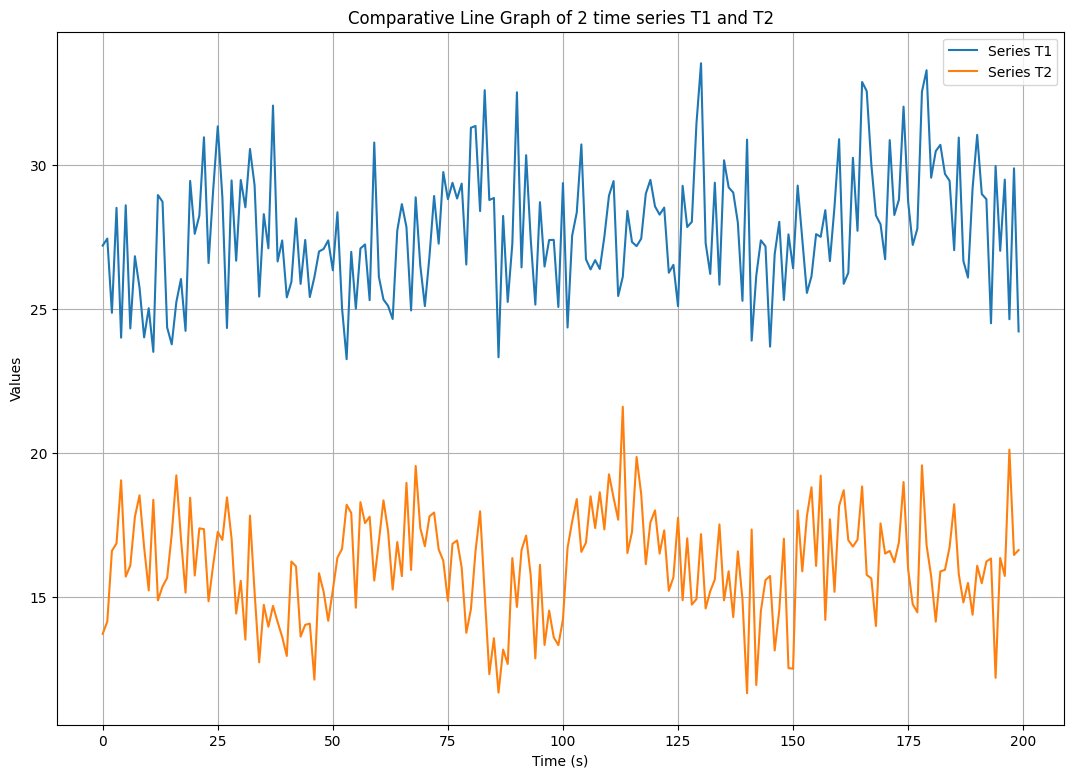

In [826]:

# plt.figure(figsize=(12, 8))
plt.title('Comparative Line Graph of 2 time series T1 and T2')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.plot(df['T1'], label='Series T1')
plt.plot(df['T2'], label='Series T2')

plt.legend()
plt.grid()
plt.show()

| No. | Hypothesis                                                                                     | Notes                                     |
|----------|-----------------------------------------------------------------------|----------------------------------------------------------------------|
| 1        | Over the time, the value of T2 is always smaller than T1's.| This can be spotted visually when the max value of T2 is approximately 21 and T1's minimum value is 23 and the 2 lines are lying separately on 2 halfs of the chart.|
| 2        | Over the given time, T1 and T2 are independent and do not share a correlation. | I did not see any shared patterns or correlation from the chart. |
| 3        | Series T2 has periodic spikes through the time | I can roughly see 4 periods where T2 series spikes.|

### Task 3.2



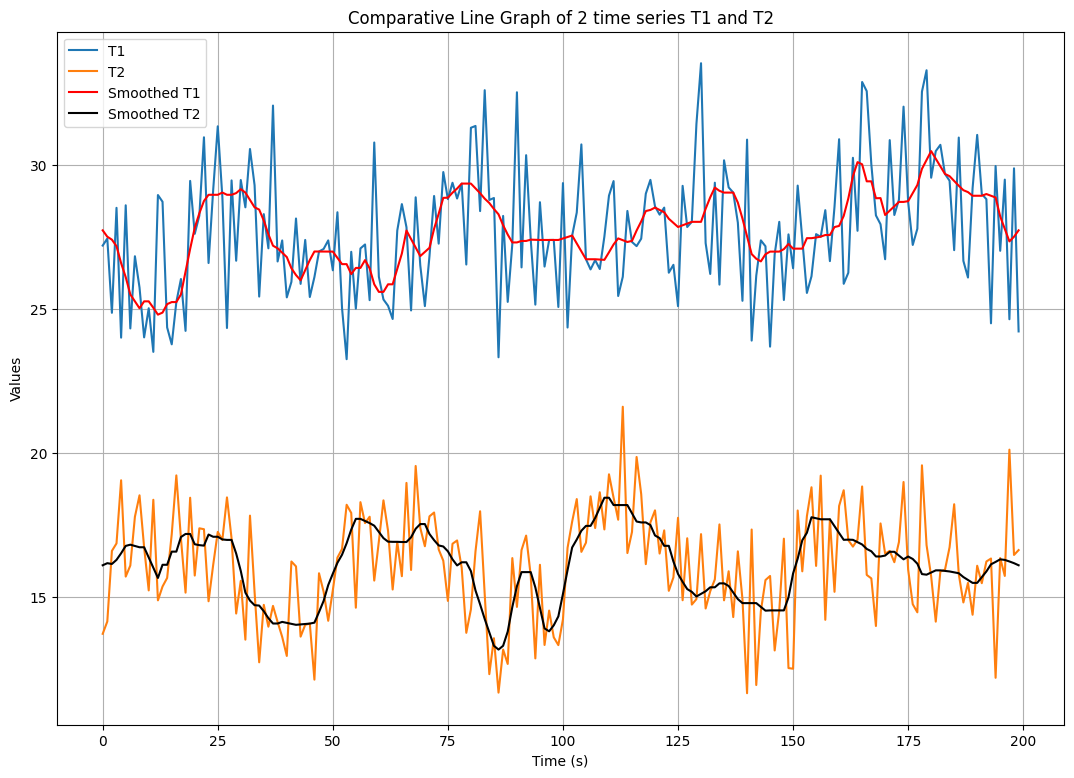

In [830]:
def mean_smoothing(data, window_size):
    res = data.rolling(window=window_size, center=True).mean()
    return res.replace(np.nan, data.mean()) #Replacing Nan with the total's mean value

def median_smoothing(data, window_size):
    res = data.rolling(window=window_size, center=True).median()
    return res.replace(np.nan, data.median()) #Replacing Nan with the total's median value

df['T1_resmooth'] =  mean_smoothing(median_smoothing(df['T1'], 7), 3)
df['T2_resmooth'] =  mean_smoothing(median_smoothing(df['T2'], 7), 3)


# plt.figure(figsize=(12, 9))
indices = list(range(len(df['T1'])))
plt.plot(df['T1'], label='T1')
plt.plot(df['T2'], label='T2')

plt.plot(indices, df['T1_resmooth'], label='Smoothed T1', color='red')
plt.plot(indices, df['T2_resmooth'], label='Smoothed T2', color='black')


plt.title('Comparative Line Graph of 2 time series T1 and T2')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

| Chosen window size | Reason               | Note |                                                                                         
|--------------------|----------------------|-------|
| 3      | Symmetry | 3 is an odd number, so that we have a middle value and we can perform our smoothing around that value.|
| 3      | Local feature | I do not want to completely ignore local features so I chose a small window size for the mean re-smoothing. You can still see that T1 has choppy, rougher line comparing to T2. If I increase the window size, this feature will be lost.|
| 7      | Global features | With this window size, I can easily spot out the global trends of the two time series.|




| Chosen smoothing method | Reason               | Note |                                                                                    
|--------------------|----------------------|-------|
|Mean    | Readability |In this case, I used mean smoothing to smooth out the mesas areas (flatted areas)|
|Median    | Edge value preservation |Median smoothing usually has sharper results, it shows the sharp transitions between value clearer comparing to mean smoothing|


### Task 3.3

#### Task 3.3 C: Cross Correlation between 2 time series T1 and T2

The Pearson correlation coefficient between T1 and T2 is: -0.0375


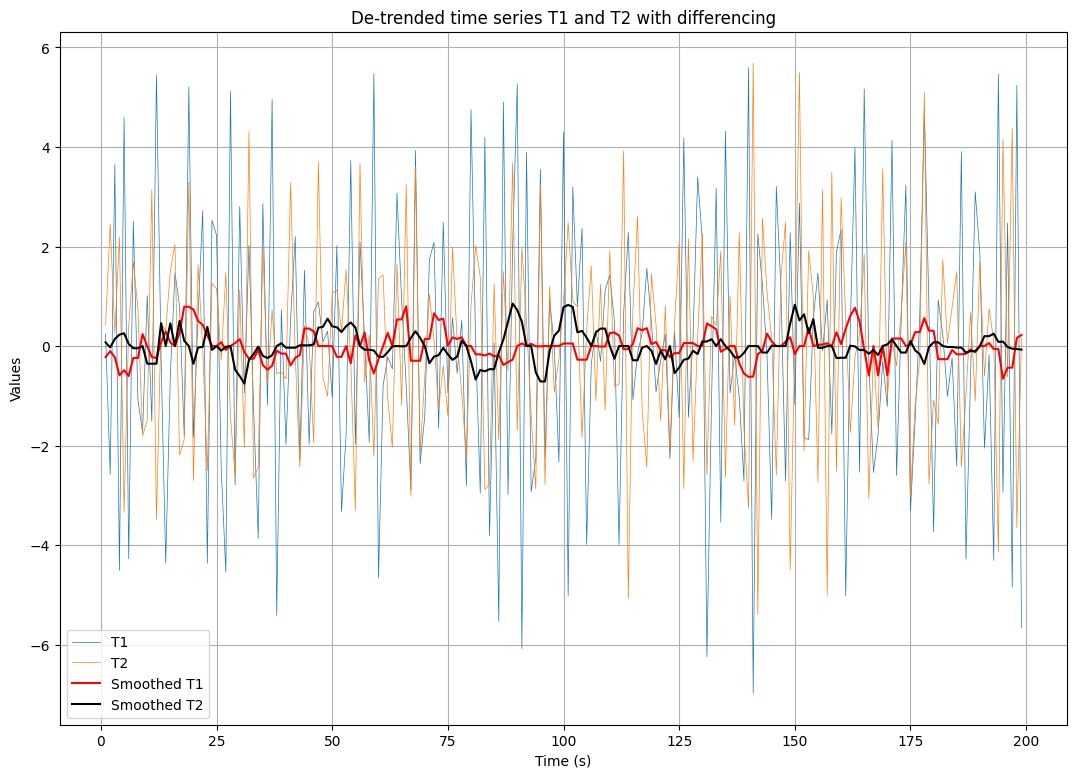

In [760]:

#(C) cross correlations
#De-trend a time series
detrended_series = df.diff().dropna()

#Plot the detrended time series
plt.plot(detrended_series['T1'], label='T1', linewidth=0.5)
plt.plot(detrended_series['T2'], label='T2', linewidth=0.5)

plt.plot(detrended_series['T1_resmooth'], label='Smoothed T1', color='red')
plt.plot(detrended_series['T2_resmooth'], label='Smoothed T2', color='black')
plt.title('De-trended time series T1 and T2 with differencing')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [860]:
#Calculate the Pearson Correlation Coefficient
corr1, _ = pearsonr(detrended_series['T1'], detrended_series['T2'])
print(f"The Pearson correlation coefficient between T1 and T2 = {corr1:.4f}")

#Shift T1 and check correlation
periods = 25
shifted_1 = detrended_series['T1'].shift(periods=periods).dropna()

corr2, _ = pearsonr(shifted_1,detrended_series['T2'].iloc[:-periods] )
print(f"The Pearson correlation coefficient between shifted T1 and T2 = {corr2:.4f} for periods = {periods}")

corr3, _ = pearsonr(df['T1'], df['Time'])
print(f"The Pearson correlation coefficient between T1 and Time = {corr3:.4f}")

corr4, _ = pearsonr(df['T2'], df['Time'])
print(f"The Pearson correlation coefficient between T2 and Time = {corr4:.4f}")


The Pearson correlation coefficient between T1 and T2 = -0.0375
The Pearson correlation coefficient between shifted T1 and T2 = 0.0047 for periods = 25
The Pearson correlation coefficient between T1 and Time = 0.2639
The Pearson correlation coefficient between T2 and Time = 0.0289


| shifted period | correlation coefficient                                       |
|----------|-----------------------------------------------------------------------|
|  10       |0.02639| 
|  20       |0.03665| 
|  25       |0.00471| 
    

| Feature | Summary                                                                                     |
|----------|-----------------------------------------------------------------------|
|  Cross Correlations   |After the de-trending, we could no longer spot out the 4 spikes of T2 series anymore. Also, a number of -0.037 for a pearson correlation coefficient indicates a very weak negative linear correlation. We also tried out different period shifts and could not spot out any significant linear correlation of T1 and T2. They are all very weak (close to 0).| 
|  Trend   |We calculated the correlation between T1 T2 and the time and we see that they both have a very slight positive trend (0.2 for T1 and 0.02 for T2)| 
|  Cyclic Variation   |NaN| 

### Task 3.4


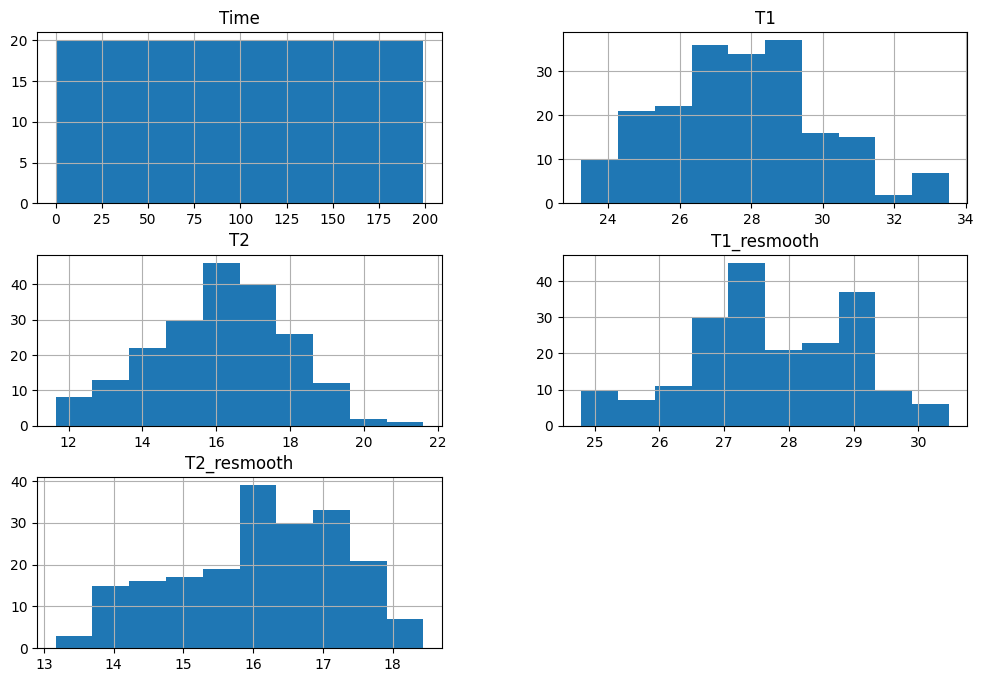

In [409]:
df.hist()
